In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
from global_land_mask import globe
import pandas as pd

cloudmaskfile=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\Cloud mask\3RIMG_01NOV2022_0015_L2B_CMK_V01R00.h5"
cmk=h5py.File(cloudmaskfile)

btfile=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01NOV2022_0015_L1B_STD_V01R00.h5"
b=h5py.File(btfile)


cmk_latitude=np.array(cmk["Latitude"])/100
cmk_longitude=np.array(cmk["Longitude"])/100

b_latitude=np.array(b["Latitude"])/100
b_longitude=np.array(b["Longitude"])/100

# #Fill value for all the datasets
# fill_value=cmk["Latitude"].attrs["_FillValue"]/100

# #Masking the fill value
# cmk_latitude=np.ma.masked_equal(cmk_latitude,fill_value)
# cmk_longitude=np.ma.masked_equal(cmk_longitude,fill_value)

# b_latitude=np.ma.masked_equal(b_latitude,fill_value)
# b_longitude=np.ma.masked_equal(b_longitude,fill_value)

#Check if two arrays are the same
np.array_equal(cmk_latitude,b_latitude), np.array_equal(cmk_longitude,b_longitude) 

(True, True)

# Masking != np.nan. Masking adds a mask to the array, but does not change the array itself.

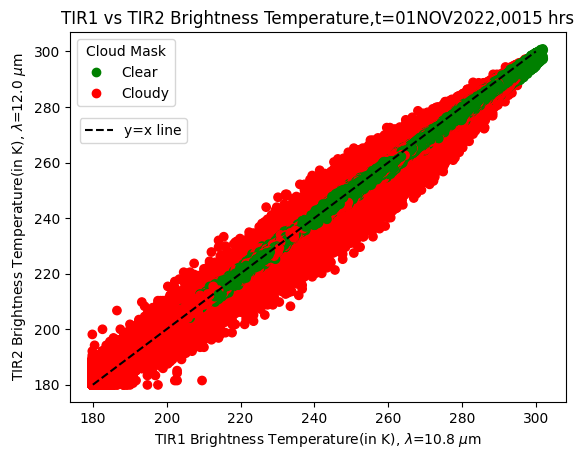

In [2]:
tir1_count=b["IMG_TIR1"][0,:,:]
tir2_count=b["IMG_TIR2"][0,:,:]

cloud_fill_value=b["IMG_TIR1"].attrs['_FillValue'][0]

#Masking
tir1_count=np.ma.masked_equal(tir1_count,cloud_fill_value)
tir2_count=np.ma.masked_equal(tir2_count,cloud_fill_value)
#Brightness Temperature calculation
tir1lut=np.array(b["IMG_TIR1_TEMP"])
tir2lut=np.array(b["IMG_TIR2_TEMP"])

#Coverting counts to brightness temperature by look up table
def count_to_bt(count,lut):
    return lut[count]

tir1bt=count_to_bt(tir1_count,tir1lut)
tir2bt=count_to_bt(tir2_count,tir2lut)

#Masking BT arrays with the mask of count arrays
tir1bt=np.ma.masked_array(tir1bt,mask=tir1_count.mask)
tir2bt=np.ma.masked_array(tir2bt,mask=tir2_count.mask)

#Cloud mask
cmk_cloudmask=cmk["CMK"][0,:,:] #It was a 3D array, so I took the first layer
cloudmask_arr_fill_value=cmk["CMK"].attrs['_FillValue'][0]
cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,cloudmask_arr_fill_value)
cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,2)
cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,3)

#tir1bt.shape, tir2bt.shape, cmk_cloudmask.shape

tir1bt_flat=tir1bt.ravel()
tir2bt_flat=tir2bt.ravel()
cmk_cloudmask_flat=cmk_cloudmask.ravel()


date=str(b.attrs['title']).split(sep="'")[1].split(sep="_")[1]
time=str(b.attrs['title']).split(sep="'")[1].split(sep="_")[2]

import warnings
warnings.filterwarnings('ignore')

fig,ax=plt.subplots()

classes1=["Clear","Cloudy","Probably clear","Probably cloudy"]
classes2=["Clear","Cloudy"]
colors1 = ListedColormap(['g','r','y','b'])
colors2= ListedColormap(['g','r'])

# custom_legend=ax.legend(title="y=x line",loc='center left')
# ax.add_artist(custom_legend)

scatter=ax.scatter(tir1bt_flat, tir2bt_flat, c=cmk_cloudmask_flat, cmap=colors2)

#Show "y=x" line legend so that it doesn't overlap with the scatter plot legend
x_sample=np.linspace(180,300,100)
y_sample=np.linspace(180,300,100)
ax.plot(x_sample,y_sample, color='k', linestyle='--',label="y=x line")
leg=ax.legend(loc=(0.02,0.7))
ax.add_artist(leg)

ax.legend(handles=scatter.legend_elements()[0], loc="upper left",labels=classes2, title="Cloud Mask")
ax.set_xlabel("TIR1 Brightness Temperature(in K), $\lambda$=10.8 $\mu$m")
ax.set_ylabel("TIR2 Brightness Temperature(in K), $\lambda$=12.0 $\mu$m")

plt.title(f'TIR1 vs TIR2 Brightness Temperature,t={date},{time} hrs')

plt.show()

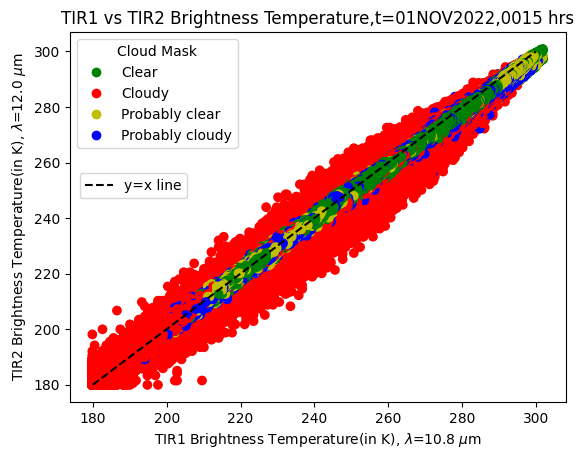

In [35]:
tir1_count=b["IMG_TIR1"][0,:,:]
tir2_count=b["IMG_TIR2"][0,:,:]

cloud_fill_value=b["IMG_TIR1"].attrs['_FillValue'][0]

#Masking
tir1_count=np.ma.masked_equal(tir1_count,cloud_fill_value)
tir2_count=np.ma.masked_equal(tir2_count,cloud_fill_value)
#Brightness Temperature calculation
tir1lut=np.array(b["IMG_TIR1_TEMP"])
tir2lut=np.array(b["IMG_TIR2_TEMP"])

#Coverting counts to brightness temperature by look up table
def count_to_bt(count,lut):
    return lut[count]

tir1bt=count_to_bt(tir1_count,tir1lut)
tir2bt=count_to_bt(tir2_count,tir2lut)

#Masking BT arrays with the mask of count arrays
tir1bt=np.ma.masked_array(tir1bt,mask=tir1_count.mask)
tir2bt=np.ma.masked_array(tir2bt,mask=tir2_count.mask)

#Cloud mask
cmk_cloudmask=cmk["CMK"][0,:,:] #It was a 3D array, so I took the first layer
cloudmask_arr_fill_value=cmk["CMK"].attrs['_FillValue'][0]
cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,cloudmask_arr_fill_value)
#cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,2)
#cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,3)

#tir1bt.shape, tir2bt.shape, cmk_cloudmask.shape

tir1bt_flat=tir1bt.ravel()
tir2bt_flat=tir2bt.ravel()
cmk_cloudmask_flat=cmk_cloudmask.ravel()

date=str(b.attrs['title']).split(sep="'")[1].split(sep="_")[1]
time=str(b.attrs['title']).split(sep="'")[1].split(sep="_")[2]


import warnings
warnings.filterwarnings('ignore')

#Plotting
fig,ax=plt.subplots()
classes1=["Clear","Cloudy","Probably clear","Probably cloudy"]
colors1 = ListedColormap(['g','r','y','b'])

# custom_legend=ax.legend(title="y=x line",loc='center left')
# ax.add_artist(custom_legend)

scatter=ax.scatter(tir1bt_flat, tir2bt_flat, c=cmk_cloudmask_flat, cmap=colors1)

#Show "y=x" line legend so that it doesn't overlap with the scatter plot legend
x_sample=np.linspace(180,300,100)
y_sample=np.linspace(180,300,100)
ax.plot(x_sample,y_sample, color='k', linestyle='--',label="y=x line")
leg=ax.legend(loc=(0.02,0.55))
ax.add_artist(leg)

ax.legend(handles=scatter.legend_elements()[0], loc="upper left",labels=classes1, title="Cloud Mask")
ax.set_xlabel("TIR1 Brightness Temperature(in K), $\lambda$=10.8 $\mu$m")
ax.set_ylabel("TIR2 Brightness Temperature(in K), $\lambda$=12.0 $\mu$m")

plt.title(f'TIR1 vs TIR2 Brightness Temperature,t={date},{time} hrs')
plt.savefig(r'C:\Users\HP\OneDrive\Desktop\Thesis work\Results' + 'CMK_BT')
plt.show()

Text(0, 0.5, ' BT_${10.8}$ - BT_${12}$ (in K)')

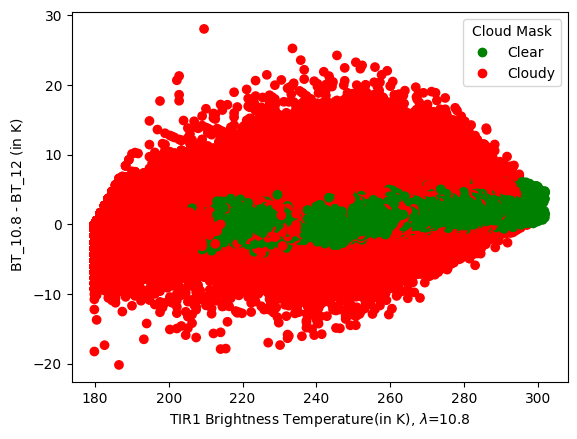

In [112]:
tir1_count=b["IMG_TIR1"][0,:,:]
tir2_count=b["IMG_TIR2"][0,:,:]

cloud_fill_value=b["IMG_TIR1"].attrs['_FillValue'][0]

#Masking
tir1_count=np.ma.masked_equal(tir1_count,cloud_fill_value)
tir2_count=np.ma.masked_equal(tir2_count,cloud_fill_value)
#Brightness Temperature calculation
tir1lut=np.array(b["IMG_TIR1_TEMP"])
tir2lut=np.array(b["IMG_TIR2_TEMP"])

#Coverting counts to brightness temperature by look up table
def count_to_bt(count,lut):
    return lut[count]

tir1bt=count_to_bt(tir1_count,tir1lut)
tir2bt=count_to_bt(tir2_count,tir2lut)

#Masking BT arrays with the mask of count arrays
tir1bt=np.ma.masked_array(tir1bt,mask=tir1_count.mask)
tir2bt=np.ma.masked_array(tir2bt,mask=tir2_count.mask)

#Cloud mask
cmk_cloudmask=cmk["CMK"][0,:,:] #It was a 3D array, so I took the first layer
cloudmask_arr_fill_value=cmk["CMK"].attrs['_FillValue'][0]
cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,cloudmask_arr_fill_value)
#cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,2)
#cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,3)


diff=(tir1bt-tir2bt).ravel() #Difference between TIR1 and TIR2 BT. Already masked

#Plotting the difference between TIR1 -TIR2 BT and TIR1 BT

fig,ax=plt.subplots()
colors1 = ListedColormap(['g','r','y','b'])
colors2= ListedColormap(['g','r'])
classes1=["Clear","Cloudy","Probably clear","Probably cloudy"]
classes2=["Clear","Cloudy"]

scatter=ax.scatter(tir1bt_flat, diff, c=cmk_cloudmask_flat, cmap=colors2)
ax.legend(handles=scatter.legend_elements()[0], labels=classes2, title="Cloud Mask")
ax.set_xlabel("TIR1 Brightness Temperature(in K), $\lambda$=10.8")
ax.set_ylabel(" BT_${10.8}$ - BT_${12}$ (in K)" )




In [3]:
import numpy as np
import matplotlib.pyplot as plt
from global_land_mask import globe

lat=np.array([[0,20],[30,40]])
lon=np.array([[70,55],[35,True]])

#print("Normal ocean mask \n", globe.is_ocean(lat,lon))
print("Normal land mask \n", globe.is_land(lat,lon))

masked=np.where(lat==20, False,globe.is_ocean(lat,lon) )

print(masked)



Normal land mask 
 [[False  True]
 [ True False]]
[[ True False]
 [False  True]]


# Plotting using sns with correct labels. L1B, 01NOV2022, 0015
1- Draw with correct labels
2- Draw the proper title and legends
3- Draw with mask if step 1 works

<AxesSubplot:>

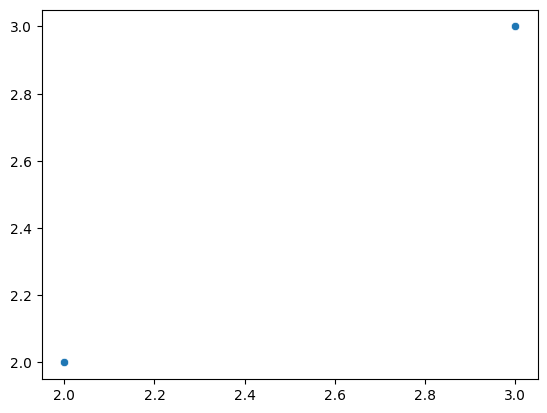

In [19]:
#To show that seaborn scatterplot can handle masked arrays. It can't handle NaNs

a=np.array([1,2,3,10])
b=np.array([1,2,3,5])
a=np.ma.masked_equal(a,10)
b=np.ma.masked_equal(b,1)
#a=np.ma.masked_equal(a,2)
a.shape
#sns.scatterplot(x=a,y=b)
sns.scatterplot(x=a,y=b)


In [41]:
tir1mask=np.ma.getmask(tir1bt)
tir1bt_flat_nonan=tir1bt_flat[~tir1mask.ravel()]
np.ma.is_masked(tir1bt_flat_nonan)

tir2mask=np.ma.getmask(tir2bt)
np.array_equal(tir2mask,tir1mask)

cloudmask=np.ma.getmask(cmk_cloudmask_flat)
np.array_equal(cloudmask,tir1mask)

cloudmask.sum(), tir1mask.sum(), tir2mask.sum()

#Problem is that I've masked 2,3 values in the cloud mask array, but they are not masked in the tir1 and tir2 arrays
# Use mask of cloudmask to mask tir1 and tir2 array

(4200083, 2136329, 2136329)

In [33]:
a=np.array([1,2,3,10,1])
b=np.array([1,2,3,5,4])
c=np.array([0,1,0,0,1])
import pandas as pd
mask1=np.array([True,False,True,True,False])
a=np.ma.masked_equal(a,mask=mask1)
b=np.ma(b,mask=mask1)
c=np.ma.masked_equal(c,1)

sns.scatterplot(x=a,y=b,
hue=pd.Categorical.from_codes(codes=c, 
categories=['Clear', 'Cloudy'],
ordered=True),

#Mask array a with a pre-defined mask

# a=np.array([1,2,3,10,1])
# b=np.array([1,2,3,5,4])
# c=np.array([0,1,0,0,1])
# import pandas as pd
# mask1=np.array([True,False,True,True,False])
# a=np.ma.masked_equal(a,mask=mask1)

palette={'Clear':'green', 'Cloudy':'red'})

TypeError: masked_equal() got an unexpected keyword argument 'mask'

# Problem is seaborn doesn't work with masked arrays. Need to remove masked elements.
Idea 1 - Take a union of cloudmask and BT. Use this mask to retrieve elements from BT1, BT2, CMK. (worked)

Actually seaborn does work with masked arrays. There was some problem with categorical value length here.

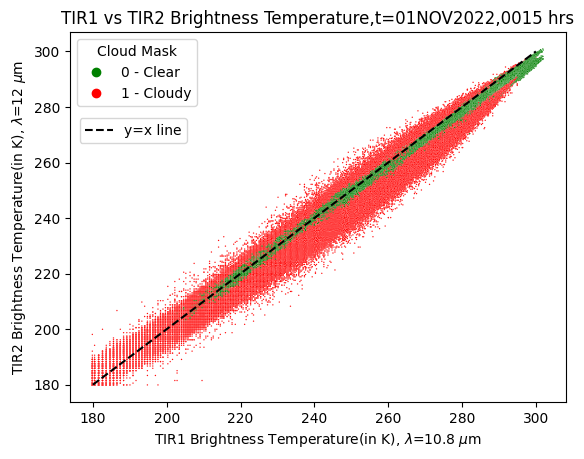

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from  global_land_mask import globe

fig,ax=plt.subplots()

ax.set_xlabel("TIR1 Brightness Temperature(in K), $\lambda$=10.8 $\mu$m")
ax.set_ylabel("TIR2 Brightness Temperature(in K), $\lambda$=12 $\mu$m")
plt.title(f'TIR1 vs TIR2 Brightness Temperature,t={date},{time} hrs')

tir1mask=np.ma.getmask(tir1bt)
cloudmask=np.ma.getmask(cmk_cloudmask_flat)
mastermask=np.logical_or(tir1mask.ravel(),cloudmask.ravel())

tir1bt_flat_nonan=tir1bt_flat[~mastermask.ravel()]
tir2bt_flat_nonan=tir2bt_flat[~mastermask.ravel()]
cmk_cloudmask_flat_nonan=cmk_cloudmask_flat[~mastermask.ravel()]


x_sample=np.linspace(180,300,100)
y_sample=np.linspace(180,300,100)
ax.plot(x_sample,y_sample, color='k', linestyle='--',label="y=x line")
leg=ax.legend(loc=(0.02,0.7))
ax.add_artist(leg)

scattter=sns.scatterplot(x=tir1bt_flat_nonan, y=tir2bt_flat_nonan, 
hue=pd.Categorical.from_codes(codes=cmk_cloudmask_flat_nonan,
categories=["0 - Clear","1 - Cloudy"],
ordered=True),
palette={'0 - Clear':'green','1 - Cloudy':'red'},
s=1,
ax=ax)
# )

ax.legend(handles=scatter.legend_elements()[0],loc="upper left",title="Cloud Mask",labels=["0 - Clear","1 - Cloudy"])


In [47]:
(tir2bt-tir1bt>0).sum(), (tir2bt-tir1bt<0).sum(), (tir2bt-tir1bt==0).sum()

(757507, 5005044, 0)

# Masking algorithm testing (masking part works)
All works fine. Mask creation, Masking, Plotting, Labelling with correct labels. 0-Clear, 1- Cloudy

Avoid latitude=9,Avoid longitude=39
Modified Land mask
 [[False False  True False  True]
 [False False  True False False]
 [ True False  True  True  True]
 [ True  True  True  True False]
 [False False  True False False]]
BT1 array
 [[214 295 205 264 260]
 [282 207 206 185 207]
 [219 203 245 235 207]
 [271 187 225 224 264]
 [263 228 221 261 201]]
BT2 array
 [[232 218 250 257 293]
 [267 187 227 211 197]
 [265 253 189 254 202]
 [218 238 292 208 238]
 [223 250 276 289 194]]
BT1 on land except (9, 39) 
 [205 260 206 219 245 235 207 271 187 225 224 221]
Corresponding BT2
 [250 293 227 265 189 254 202 218 238 292 208 276]
Cloud mask
 [1 0 0 1 1 1 1 0 1 1 1 0]


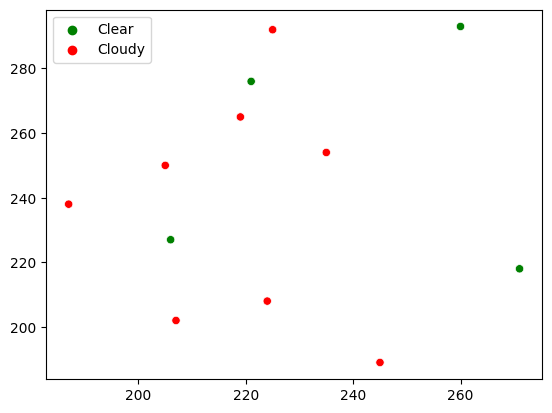

Text(4.444444444444452, 0.5, 'TIR2 sample BT')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from global_land_mask import globe
import seaborn as sns
import pandas as pd

#Generating random Brightness temperature values within realistic range
bt1_sample=np.random.randint(180,300,size=[5,5])
bt2_sample=np.random.randint(180,300,size=[5,5])
#Generating random latitudes and longitudes within realistic range
latitude_sample=np.random.randint(-80,80,size=[5,5])
longitude_sample=np.random.randint(0,100,size=[5,5])
cloudmask_sample=np.random.randint(0,2,size=[5,5])

#print("Latitude array\n",latitude_sample)
#print("Longitude array\n",longitude_sample)

land_mask=globe.is_land(latitude_sample,longitude_sample)


#Avoid this specific values where land=True. It should be assigned Land=False
#Avoid if latitude_sample==a random value for which land_mask==True i.e. say latitude_sample==20[land_mask][0]
avoid_lat=latitude_sample[land_mask][0]
avoid_lon=longitude_sample[land_mask][0]

print("Avoid latitude={},Avoid longitude={}".format(avoid_lat,avoid_lon))
land_mask=np.where((latitude_sample==avoid_lat)|(longitude_sample==avoid_lon),False,land_mask)

#print("Latitude array\n",latitude_sample)
#print("Longitude array\n",longitude_sample)
#print("Land mask\n",land_mask)
print("Modified Land mask\n",land_mask)
print("BT1 array\n",bt1_sample)
print("BT2 array\n",bt2_sample)

#Masking BT arrays with the land mask
print("BT1 on land except {} \n {}".format((avoid_lat,avoid_lon),bt1_sample[land_mask]))
print("Corresponding BT2\n",bt2_sample[land_mask])
print("Cloud mask\n",cloudmask_sample[land_mask])

fig,ax=plt.subplots()

# scatter=ax.scatter(bt1_sample[land_mask],bt2_sample[land_mask],c=cloudmask_sample[land_mask])

# ax.legend(handles=scatter.legend_elements()[0], labels=["Clear","Cloudy"], title="Cloud Mask")
# ax.set_xlabel("TIR1 sample BT")
# ax.set_ylabel("TIR2 sample BT")

sns.scatterplot(
x=bt1_sample[land_mask], 
y=bt2_sample[land_mask],
hue=pd.Categorical.from_codes(codes=cloudmask_sample[land_mask], 
categories=['Clear', 'Cloudy'],
ordered=True),
palette={'Clear':'green', 'Cloudy':'red'})
plt.show()

ax.set_xlabel("TIR1 sample BT")
ax.set_ylabel("TIR2 sample BT")


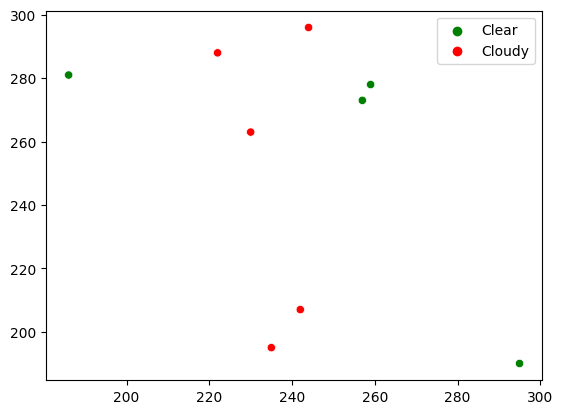

In [4]:
sns.scatterplot(x=bt1_sample[land_mask], y=bt2_sample[land_mask],
hue=pd.Categorical.from_codes(codes=cloudmask_sample[land_mask], categories=['Clear', 'Cloudy'],
ordered=True),palette={'Clear':'green', 'Cloudy':'red'})
plt.show()

In [10]:
scatter=ax.scatter(np.array([1,2,3]),np.array([1,2,3]),c=np.array([0,1,0]),cmap=ListedColormap(['blue','red']))

# Plotting for land only, 01Nov2022 0015 hours. BT1~BT2, CMK
Remember to run the small code just above for the legend. A bit of cheating par chalta hai.

Text(0.5, 0.92, 'Over land only')

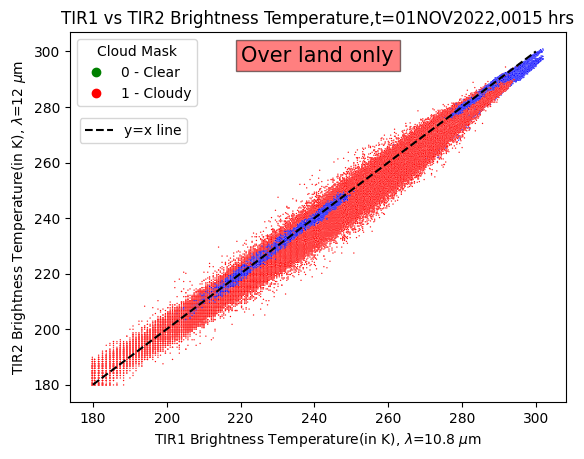

In [3]:
import seaborn as sns

tir1_count=b["IMG_TIR1"][0,:,:]
tir2_count=b["IMG_TIR2"][0,:,:]

cloud_fill_value=b["IMG_TIR1"].attrs['_FillValue'][0]
b_latitude=np.array(b["Latitude"])/100
b_longitude=np.array(b["Longitude"])/100

#Masking
tir1_count=np.ma.masked_equal(tir1_count,cloud_fill_value)
tir2_count=np.ma.masked_equal(tir2_count,cloud_fill_value)
#Brightness Temperature calculation
tir1lut=np.array(b["IMG_TIR1_TEMP"])
tir2lut=np.array(b["IMG_TIR2_TEMP"])

#Coverting counts to brightness temperature by look up table
def count_to_bt(count,lut):
    return lut[count]

tir1bt=count_to_bt(tir1_count,tir1lut)
tir2bt=count_to_bt(tir2_count,tir2lut)

#Masking BT arrays with the mask of count arrays
tir1bt=np.ma.masked_array(tir1bt,mask=tir1_count.mask)
tir2bt=np.ma.masked_array(tir2bt,mask=tir2_count.mask)
btmask=np.ma.getmask(tir1bt)

#Cloud mask
cmk_cloudmask=cmk["CMK"][0,:,:] #It was a 3D array, so I took the first layer
cloudmask_arr_fill_value=cmk["CMK"].attrs['_FillValue'][0]
cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,cloudmask_arr_fill_value)
cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,2)
cmk_cloudmask=np.ma.masked_equal(cmk_cloudmask,3)
cloudmask_mask=np.ma.getmask(cmk_cloudmask)

#Preparing the land mask. 1=Land, 0= Not water (either ocean or not defined)
#Logic, is_land won't work with masked, out of range lat,lon values. That's 
# why we need to pass a fake lat,lon value that's not there in our dataset, later deal with it

b_latitude[b_latitude==327.67]=82.0
b_longitude[b_longitude==327.67]=160.0

crude_land_mask=globe.is_land(b_latitude,b_longitude)
land_mask=np.where((b_latitude==82.0)|(b_longitude==160.0),False,crude_land_mask)

#Preparing the master mask. It is the combination of all masks

master_mask=np.logical_and(~btmask,np.logical_and(~cloudmask_mask,land_mask))

#Retrieving the BT and cloud label values from the master mask, for plotting
bt1land=tir1bt[master_mask]
bt2land=tir2bt[master_mask]
cmkland=cmk_cloudmask[master_mask]

#Scatterplot by seaborn

fig,ax=plt.subplots()
ax.set_xlabel("TIR1 Brightness Temperature(in K), $\lambda$=10.8 $\mu$m")
ax.set_ylabel("TIR2 Brightness Temperature(in K), $\lambda$=12 $\mu$m")
date=str(b.attrs['title']).split(sep="'")[1].split(sep="_")[1]
time=str(b.attrs['title']).split(sep="'")[1].split(sep="_")[2]
plt.title(f'TIR1 vs TIR2 Brightness Temperature,t={date},{time} hrs')

x_sample=np.linspace(180,300,100)
y_sample=np.linspace(180,300,100)
ax.plot(x_sample,y_sample, color='k', linestyle='--',label="y=x line")
leg=ax.legend(loc=(0.02,0.7))
ax.add_artist(leg)

scattter=sns.scatterplot(x=bt1land.ravel(), y=bt2land.ravel(),
hue=pd.Categorical.from_codes(codes=cmkland.ravel(),
categories=["0 - Clear","1 - Cloudy"],
ordered=True),
palette={'0 - Clear':'blue','1 - Cloudy':'red'},
s=1,
ax=ax)
#ax.legend(title="Cloud Mask")


ax.legend(handles=scatter.legend_elements()[0],loc="upper left",title="Cloud Mask",labels=["0 - Clear","1 - Cloudy"])

ax.text(0.5,0.92,f"Over land only",bbox=dict(facecolor='red', alpha=0.5),
horizontalalignment='center',fontsize=15,transform=ax.transAxes)

In [4]:
#Finding mimimum BT for clear pixels over land.





179.85948

198.99716


<AxesSubplot:>

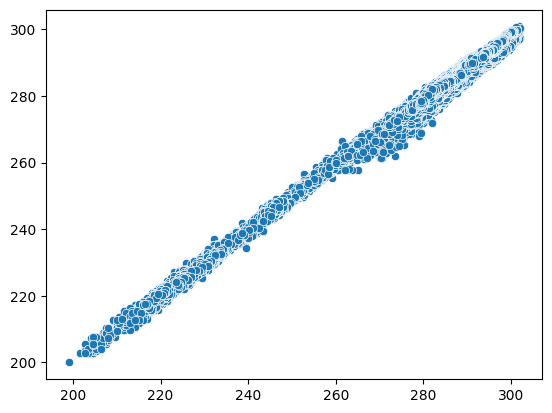

In [7]:
# Find a high temperature clear pixel, geolocate it, and annotate it on the plot

cmk_cloudmask_clearonly=np.ma.masked_equal(cmk_cloudmask,1)
cloudmask_clearonly_mask=np.ma.getmask(cmk_cloudmask_clearonly)

master_mask_clearonly=np.logical_and(~btmask,np.logical_and(~cloudmask_clearonly_mask,land_mask))

bt1land_clearonly=tir1bt[master_mask_clearonly]
bt2land_clearonly=tir2bt[master_mask_clearonly]
cmkland_clearonly=cmk_cloudmask_clearonly[master_mask_clearonly]
print(np.min(bt1land_clearonly))
sns.scatterplot(x=bt1land_clearonly.ravel(), y=bt2land_clearonly.ravel())

In [8]:
np.sum(tir1bt==np.min(bt1land_clearonly))

3090

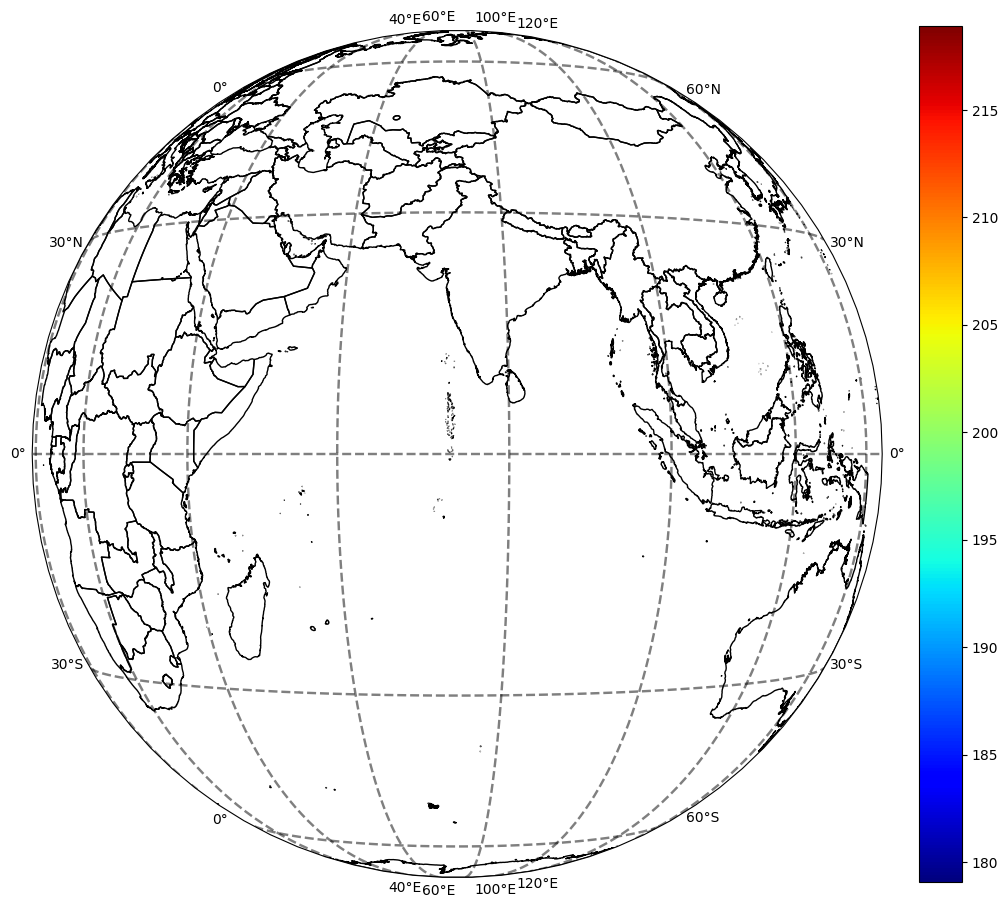

In [21]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

tirbt_minvalueonly=np.ma.masked_not_equal(tir1bt,np.min(bt1land_clearonly))


fig=plt.figure(figsize=(12,12))
ax1 = plt.axes(projection=ccrs.Geostationary(central_longitude=74))
ax1.coastlines(color='white')
ax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax1.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)

map_extend_geos = ax1.get_extent(crs=ccrs.Geostationary(central_longitude=74))

plot1=plt.imshow(tirbt_minvalueonly,
extent=map_extend_geos,
#norm=divnorm,
cmap='jet')#,cmap='gray' #'jet' map has more intense variations, thus better contrast
cbar=plt.colorbar(plot1,ax=ax1,fraction=0.046,pad=0.04)

In [23]:
np.unravel_index(np.nanargmin(np.abs(tir1bt-np.min(bt1land_clearonly))),tir1bt.shape)



(172, 852)

In [41]:
a=np.array([1,2,3,4,5,6,7,8,9,10])
a=np.ma.masked_equal(a,3 or 5)
a

masked_array(data=[1, 2, --, 4, 5, 6, 7, 8, 9, 10],
             mask=[False, False,  True, False, False, False, False, False,
                   False, False],
       fill_value=3)

In [17]:
list(bt1land).count(np.max(bt1land))

2

In [28]:
np.array_equal(np.ma.getmask(tir1bt),np.ma.getmask(tir2bt))

True

In [93]:
np.(tir1bt==np.max(tir1bt))

5

In [129]:
len(bt1land.ravel())


2680671

ModuleNotFoundError: No module named 'xgboost'